# BMMW
---


# Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statistics import mean
import warnings

warnings.filterwarnings('ignore')

# Import data

In [4]:
data = pd.read_csv("final_train.csv")
data = data.drop(columns = ["Unnamed: 0"])
data.head()

,Activity,"angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyAccMean,gravity)","angle(tBodyGyroJerkMean,gravityMean)","angle(tBodyGyroMean,gravityMean)",energy-mean(),"fBodyAcc-bandsEnergy()-1,16",...,tGravityAccMag-energy(),tGravityAccMag-entropy(),tGravityAccMag-iqr(),tGravityAccMag-mad(),tGravityAccMag-max(),tGravityAccMag-mean(),tGravityAccMag-min(),tGravityAccMag-sma(),tGravityAccMag-std(),void()
0,STANDING,-1.574191,-0.805700,-2.453831,-1.861714,0.115517,-2.023369,3.125860,-9.474436,3.622600,...,5.049130,3.272281,5.103018,-0.823302,3.063681,-0.928676,-1.007695,3.094236,1.669987,1.0
1,WALKING_UPSTAIRS,-1.568669,-0.612620,-2.488338,-1.751117,0.218134,0.280294,7.953403,-0.679894,2.512880,...,4.565443,4.440779,3.288399,-2.689605,1.705341,-0.822617,-0.572410,-2.187890,-0.544652,2.0
2,LAYING,-1.548333,-0.139628,-2.380889,-1.915239,0.067613,-0.887342,6.007361,-11.906904,3.621984,...,5.059609,2.296603,5.344174,-0.549843,3.272225,-0.940610,-1.031522,-2.071755,2.024442,3.0
3,WALKING,-1.574094,-0.793443,-2.449959,-1.842741,-0.195625,-0.950671,2.104353,-11.906121,3.355701,...,4.860758,4.177535,3.950012,-0.322642,2.366287,-0.866937,-0.696431,1.863375,0.550414,2.0
4,LAYING,-1.548333,-0.139628,-2.380889,NaN,0.067613,-0.887342,6.007361,-11.970485,3.621984,...,5.059609,2.296603,5.344174,-0.549843,3.272225,-0.940610,-1.031522,-2.102513,2.024442,3.0


# Data understanding

In [5]:
# All activities
activities = set(data.Activity)
print(activities)
print("Number of activities: {}".format(len(activities)))

{'STANDING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS', 'SITTING', 'LAYING', 'WALKING'}
Number of activities: 6


In [6]:
# Printing number of features and observations
print("Number of features:", data.shape[1])
print("Number of observations:", data.shape[0])

Number of features: 572
Number of observations: 11086


In [7]:
# Printing number of observations depending on activity
data.groupby('Activity').count().iloc[:,0]

Activity
LAYING                2149
SITTING               2014
STANDING              1971
WALKING               1890
WALKING_DOWNSTAIRS    1380
WALKING_UPSTAIRS      1625
Name: angle(X,gravityMean), dtype: int64

# Filling missing data

In [8]:
print("Number of missing data: " + str(sum(data.isna().sum())))
data.isna().sum()
data = data.fillna(data.median())
print("Number of missing data after filling: " + str(sum(data.isna().sum())))

Number of missing data: 32636
Number of missing data after filling: 0


# Data Visualization

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca = pca.fit_transform(data.drop(columns = ["Activity"]))

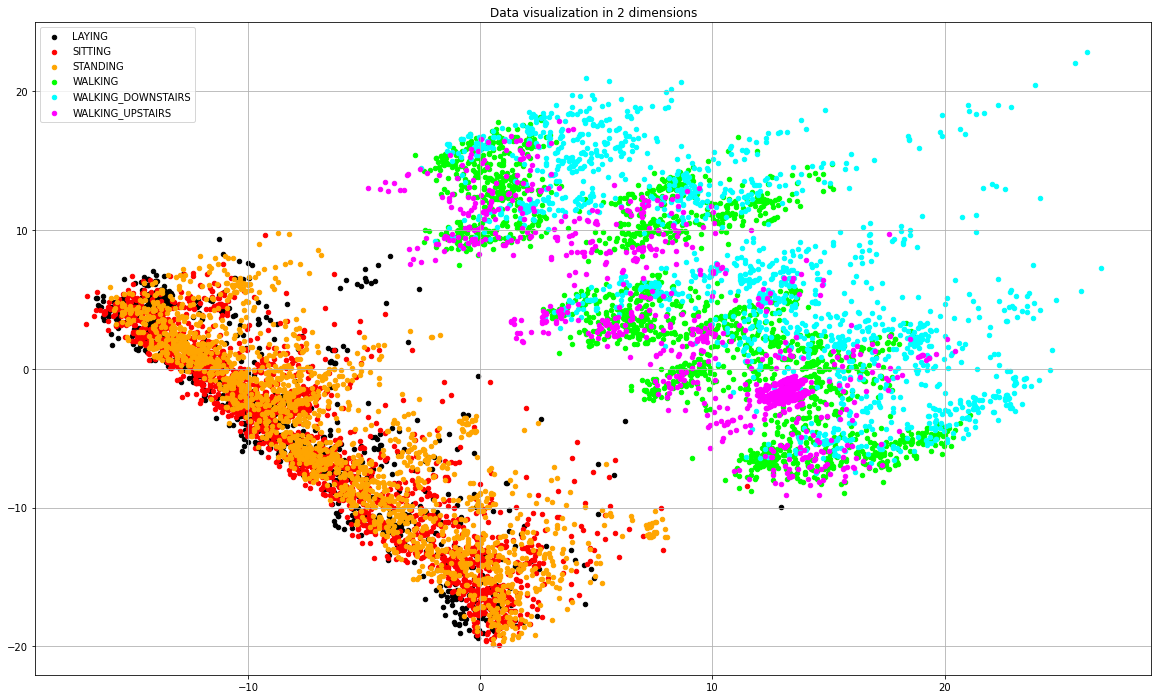

In [10]:
point_size = 20
colors = ['black', 'red', 'orange', 'lime', 'cyan', 'magenta']
labels = ['LAYING',
         'SITTING',
         'STANDING',
         'WALKING',
         'WALKING_DOWNSTAIRS',
         'WALKING_UPSTAIRS']

fig, ax = plt.subplots(figsize=(20, 12))
for color, label in zip(colors, labels):
    ax.scatter(pca[:,0][data.Activity.to_numpy()==label], 
               pca[:,1][data.Activity.to_numpy()==label], 
               s = point_size, 
               color = color, 
               label = label)
    
ax.legend()
ax.set_title("Data visualization in 2 dimensions")
ax.grid(True)
plt.show()

# Data modifications
---

In [11]:
y_data = data.Activity
data = data.drop(columns = ["Activity"])

### Remove highly correlated features

In [12]:
# KORELACJA

# corr_data = data['angle(X,gravityMean)'].corr(data['angle(Y,gravityMean)']) #Korelacja między 2 kolumnami

# Obliczenie modułu korelacji
corr_matrix = data.corr().abs()
# Próg maksymalnego skorelowania
thresh = 0.95
# Wystarczy macierz górnotrójkątna (macierz symetryczna)
upper_triu_corr = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
triu_cols = upper_triu_corr.columns
# Jeśli jakakolwiek cecha skorelowana ponad próg - do usunięcia
high_correlated_features = [column for column in triu_cols if any(upper_triu_corr[column] > thresh)]
# Usunięcie
data = data.drop(data[high_correlated_features], axis = 1)

In [14]:
# Dane po usunięciu korelacji (znacząca redukcja kolumn)
data

,"angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyAccMean,gravity)","angle(tBodyGyroJerkMean,gravityMean)","angle(tBodyGyroMean,gravityMean)",energy-mean(),"fBodyAcc-bandsEnergy()-1,16","fBodyAcc-bandsEnergy()-1,16.1",...,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-sma(),tGravityAccMag-mad(),tGravityAccMag-sma(),void()
0,-1.574191,-0.805700,-2.453831,-1.861714,0.115517,-2.023369,3.125860,-9.474436,3.622600,6.137246,...,8.394366,3.246233,0.937300,4.725389,-1.578871,-0.442374,6.357369,-0.823302,3.094236,1.0
1,-1.568669,-0.612620,-2.488338,-1.751117,0.218134,0.280294,7.953403,-0.679894,2.512880,5.740178,...,8.112279,1.926083,2.348895,4.719540,-1.521161,-0.463599,6.077734,-2.689605,-2.187890,2.0
2,-1.548333,-0.139628,-2.380889,-1.915239,0.067613,-0.887342,6.007361,-11.906904,3.621984,6.158630,...,7.690866,3.055395,1.937417,4.684114,-1.580576,-0.359234,5.893237,-0.549843,-2.071755,3.0
3,-1.574094,-0.793443,-2.449959,-1.842741,-0.195625,-0.950671,2.104353,-11.906121,3.355701,5.695567,...,8.394366,3.246233,1.256970,4.708756,-1.557720,-0.407105,6.314269,-0.322642,1.863375,2.0
4,-1.548333,-0.139628,-2.380889,-1.865249,0.067613,-0.887342,6.007361,-11.970485,3.621984,6.158630,...,7.690866,3.055395,1.937417,4.684114,-1.580576,-0.359234,5.893237,-0.549843,-2.102513,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11081,-1.568669,-0.612620,-2.488338,-1.751117,0.218134,0.280294,7.953403,-0.679894,2.512880,5.740178,...,8.112279,1.926083,2.348895,4.719540,-1.521161,-0.463599,6.077734,-2.689605,3.534816,2.0
11082,-1.550288,-0.231565,-2.376561,-1.868524,0.007653,-0.077020,5.494466,-5.860692,3.603169,6.137144,...,8.093967,2.715915,1.913262,4.724055,-1.576766,-0.375922,5.869809,-0.998495,-1.984575,1.0
11083,-1.569815,-0.794940,-2.482325,-1.784151,0.021844,-0.740329,8.005261,-11.916107,2.644861,5.436273,...,7.189854,3.246233,2.348895,4.499738,-1.464568,-0.856437,6.057005,-6.032382,3.427548,1.0
11084,-1.574768,-0.752847,-2.449529,-1.737755,-0.189761,-0.454246,8.054443,-5.611277,2.473134,5.433737,...,8.070087,3.246233,0.239752,4.633185,-1.404707,-0.637358,6.379030,-6.200222,3.385405,3.0


### Encode activities

In [10]:
encoder = {'LAYING' : 0,
         'SITTING' : 1,
         'STANDING' : 2,
         'WALKING' : 3,
         'WALKING_DOWNSTAIRS' : 4,
         'WALKING_UPSTAIRS' : 5}

y_data = y_data.replace(encoder)

### Outliers

In [11]:
from scipy import stats

z = np.abs(stats.zscore(data))

print(data.shape)
data = data[(z < 6).all(axis=1)]
y_data = y_data[(z < 6).all(axis=1)]
print(data.shape)

(11086, 571)
(9900, 571)


### Data normalization

In [12]:
from sklearn import preprocessing

x = data.values
columns = data.columns

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

data = pd.DataFrame(x_scaled, columns = columns)

In [13]:
print("Number of missing data: " + str(sum(data.isna().sum())))

Number of missing data: 0


### Reduction of skewness

In [14]:
for index, value in data.skew().items():
    if value > 4:
        data[index] = (data[index] + 1).apply(np.log)
    elif value < -4:
        data[index] = data[index] * data[index]

# Split data

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, y_data, test_size = 0.20)

# Features selection
---
We seleted feature based on feature importance for model

In [16]:
#Import some sklearn things
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [17]:
model_sel = RandomForestClassifier(n_estimators=50)
model_sel.fit(data, y_data)
m = model_sel.feature_importances_

In [18]:
print("Maksymalna ważność cechy: " +str(max(m)))
print("Minimalna ważność cechy: " +str(min(m)))
print("Średnia ważność cechy: " +str(mean(m)))

Maksymalna ważność cechy: 0.03276148153913708
Minimalna ważność cechy: 3.267679059653065e-06
Średnia ważność cechy: 0.0017513134851138354


### Automatyczne szukanie najlepszego progu (dla każdego z modeli osobno)

In [51]:
# Szukanie najlepszego progu (ustalono zakres 0-0.0005 na podstawie wygenerowanego wyzej wykresu)
threshs = np.linspace(0, max(m) - 0.029, 20)

# Listy na accuracy dla poszczególnych modeli
acc_forest = []
acc_svc = []
acc_logistic = []

# Lista na liczbę cech
feat_no = []
best_feat_list = []

# Przeszukujemy w pętli progi i testujemy klasyfiaktory (trenujemy na wybranym zestawie (liczbie) cech zależnym od progu)
for thresh in threshs:
    bestFeatureIndex = []
    for i, val in enumerate(m): 
        if(val>thresh):
            bestFeatureIndex.append(i)

    # Dodaj najlepsze cechy do listy
    best_feat_list.append(bestFeatureIndex)
            
    X_train_sel = X_train.values[:, bestFeatureIndex]
    X_test_sel = X_test.values[:, bestFeatureIndex]

    # Redukcja przy progu zadanym
    feat_no.append(X_test_sel.shape[1])
    
    # Walidacja krzyżowa oceniająca dokładność modelu - Random Forrest
    clf = RandomForestClassifier(n_estimators=10)
    cv_results = cross_validate(clf, X_train_sel, y_train, cv=3)
    acc_forest.append(mean(cv_results['test_score']))
    
    # Walidacja krzyżowa oceniająca dokładność modelu - Logistic Regression
    clf = LogisticRegression(max_iter = 1000)
    cv_results = cross_validate(clf, X_train_sel, y_train, cv=3)
    acc_logistic.append(mean(cv_results['test_score']))
    
    # Walidacja krzyżowa oceniająca dokładność modelu - SVC
    clf = SVC(gamma='auto')
    cv_results = cross_validate(clf, X_train_sel, y_train, cv=3)
    acc_svc.append(mean(cv_results['test_score']))

In [52]:
feat_no

[571,
 423,
 264,
 198,
 167,
 155,
 145,
 139,
 133,
 129,
 128,
 125,
 119,
 110,
 104,
 99,
 92,
 89,
 87,
 87]

### Wyrysowanie zależności

Text(0.5, 1.0, 'SVC')

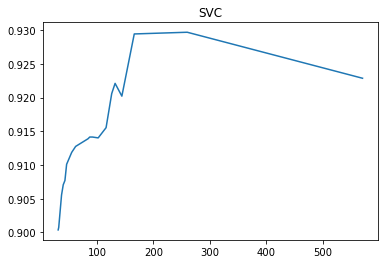

In [48]:
plt.plot(feat_no, acc_svc)
plt.title("SVC")

Text(0.5, 1.0, 'Random Forrest')

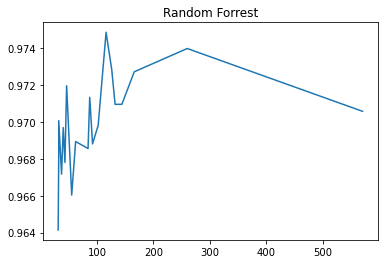

In [49]:
plt.plot(feat_no, acc_forest)
plt.title("Random Forrest")

Text(0.5, 1.0, 'Logistic Regression')

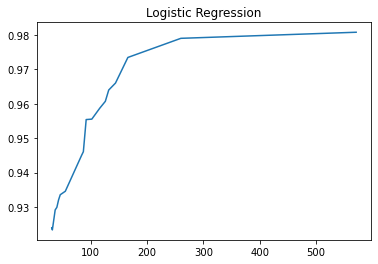

In [50]:
plt.plot(feat_no, acc_logistic)
plt.title("Logistic Regression")

### Manualny wybór najlepszych zestawów cech

In [ ]:
#todo

In [ ]:
# # Las
# FOREST_best_feat_index = best_feat_list[acc_forest.index(max(acc_forest))]
# # SVC
# SVC_best_feat_index = best_feat_list[acc_svc.index(max(acc_svc))]

In [ ]:
# X_train_sel = X_train.values[:, FOREST_best_feat_index]
# X_test_sel = X_test.values[:, FOREST_best_feat_index]
# print(len(FOREST_best_feat_index))
# print(len(SVC_best_feat_index))

# Build and fit model

In [54]:
#more sklearn things
from sklearn.metrics import classification_report, confusion_matrix 

In [67]:
# Grid searching for best model params

# Random Forrest
model = RandomForestClassifier()

param_grid = {'n_estimators': [10, 30, 80, 100, 150],  
              'max_depth': [3, 5, 7]
             } 

grid_rf = GridSearchCV(model, param_grid, n_jobs=-1)
grid_rf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7],
                         'n_estimators': [10, 30, 80, 100, 150]})

In [60]:
# Logistic Regression
model = LogisticRegression()

param_grid = {"C": np.logspace(-3,3,7),  
              "penalty": ["l1", "l2"],
              "max_iter" : [1000]
             } 

grid_logistic = GridSearchCV(model, param_grid, n_jobs=-1)
grid_logistic.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'max_iter': [1000], 'penalty': ['l1', 'l2']})

In [61]:
# SVC
model = SVC()

param_grid = {'C':[1,10,100,1000],
              'gamma':[1, 0.1, 'auto'], 
              'kernel':['linear','rbf']}

grid_svc = GridSearchCV(model, param_grid, n_jobs=-1)
grid_svc.fit(X_train, y_train)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']})

# Evaluate all models on test data

In [68]:
accs = []

In [69]:
# Random Forrest
grid_rf_predictions = grid_rf.predict(X_test) 
print(classification_report(y_test, grid_rf_predictions))
rf_acc = np.mean(grid_rf_predictions == y_test)
accs.append(rf_acc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       418
           1       0.96      0.94      0.95       363
           2       0.94      0.96      0.95       374
           3       0.96      0.99      0.97       313
           4       0.96      0.96      0.96       197
           5       0.98      0.94      0.96       315

    accuracy                           0.97      1980
   macro avg       0.97      0.97      0.97      1980
weighted avg       0.97      0.97      0.97      1980



In [70]:
# Logistic Regession
grid_logistic_predictions = grid_logistic.predict(X_test) 
print(classification_report(y_test, grid_logistic_predictions))
logistic_acc = np.mean(grid_logistic_predictions == y_test)
accs.append(logistic_acc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       418
           1       0.97      0.96      0.96       363
           2       0.97      0.97      0.97       374
           3       0.99      1.00      1.00       313
           4       0.99      1.00      1.00       197
           5       1.00      0.99      0.99       315

    accuracy                           0.98      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.98      0.98      0.98      1980



In [71]:
# SVC
grid_svc_predictions = grid_svc.predict(X_test) 
print(classification_report(y_test, grid_svc_predictions))
svc_acc = np.mean(grid_svc_predictions == y_test)
accs.append(svc_acc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       418
           1       0.98      0.98      0.98       363
           2       0.98      0.98      0.98       374
           3       1.00      1.00      1.00       313
           4       0.99      1.00      0.99       197
           5       1.00      0.99      0.99       315

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980



### Choosing the best model

In [82]:
best = accs.index(max(accs))
if best == 0:
    model = grid_rf
elif best == 1:
    model = grid_logistic
else:
    model = grid_svc
    
print("Accuracy: " + str(np.mean(model.predict(X_test) == y_test)))

Accuracy: 0.9914141414141414


In [83]:
print(best)

2


### Conclusions
---
- 


# Save model and settings

In [ ]:
import pickle

out = {"model" : model,
       "scaler" : min_max_scaler,
       "encoder" : encoder,
       "features" : FOREST_best_feat_index
       }

pickle.dump(out, open("model.pkl", "wb" ))